<a href="https://colab.research.google.com/github/theBuluku/Nairobi_Hospital_-Hypothyroidism_Detection_Project/blob/master/Nairobi_Hospital_Hypothyroidism__Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement.

To determine whether or not the patient's symptoms indicate that the patient has hypothyroid.

# Metrics of Sucess.


#Importing Environments to use in the Project.

In [0]:
#Import libraries
import numpy as np
import pandas as pd
import pydotplus
#Importing decision tree modules.
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.svm import SVC
# Import Suport Vector Classifier module from svm library. We'll use SVC to model our data
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import train_test_split
#Import scikit-learn module for accuracy calculation
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from imblearn.over_sampling import SMOTE 

#Dataset Loading.

In [0]:
#Loading our dataset to use for modelling and displaying the first five rows of the data.
nairobi_hosp_data=pd.read_csv('hypothyroid.csv')
nairobi_hosp_data.head(6)

#Exploratory Data Analysis.

This section is for the purpose of getting insights from our dataset and exploring more from our data.

In [0]:
#checking the statistical information of the data
nairobi_hosp_data.describe()

In [0]:
#checking the number of rows and columns
nairobi_hosp_data.shape

In [0]:
#checking the general information about the dataset
nairobi_hosp_data.info()

In [0]:
#Checking for the data types in the dataset.
nairobi_hosp_data.dtypes

In [0]:
#Replacing "?" entries with null values
nairobi_hosp_data=nairobi_hosp_data.replace('?',np.nan)
nairobi_hosp_data.isnull().sum()

In [0]:
# Getting unique values for categorical columns
columns = nairobi_hosp_data.columns
for i in columns:
  print(i)
  print(nairobi_hosp_data[i].unique())
  print("******************")
  print("\n")

In [0]:
# changing the the data types of the dataset
cat =['status','sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured','T4U_measured','FTI_measured','TBG_measured']
for i in nairobi_hosp_data.columns:
  if i in cat:
    nairobi_hosp_data[i] =nairobi_hosp_data[i].astype('category')
  else:
    nairobi_hosp_data[i] = pd.to_numeric(nairobi_hosp_data[i])
nairobi_hosp_data.dtypes

In [0]:
# Dealing with missing values
# For age and sex, i will fill with most common age and sex respectively which use of mode
nairobi_hosp_data['age'] = nairobi_hosp_data['age'].fillna(nairobi_hosp_data['age'].mode()[0])

nairobi_hosp_data['sex'] = nairobi_hosp_data['sex'].fillna(nairobi_hosp_data['sex'].mode()[0])
nairobi_hosp_data.isnull().sum()

In [0]:
# Filling the null valued that were not measured with 0
unit_df = ['TSH','T3','TT4','T4U','FTI','TBG']

for i in unit_df:
  nairobi_hosp_data[i].fillna(value = 0, inplace=True)

In [53]:
# Checking for duplicates
nairobi_hosp_data.duplicated().any()

True

In [55]:
# Dropping the duplicates

nairobi_hosp_data.drop_duplicates(inplace=True)


# Checking that the duplicates have actualy been dropped

nairobi_hosp_data.duplicated().any()

False

In [0]:
# Checking the relationship among all the variables

sns.pairplot(nairobi_hosp_data)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Checking the relationship between T4U and TBG
sns.lmplot(x='T4U',y='TBG',hue='status',data=nairobi_hosp_data,palette=dict(hypothyroid='yellow',negative='red'),fit_reg=False)
plt.title("Scatter of T4U against TBG",color="blue",fontsize=15)
plt.xlabel("Scatter of T4U" ,fontsize=15)
plt.ylabel("Scatter of TBG" ,fontsize=15)
plt.show()

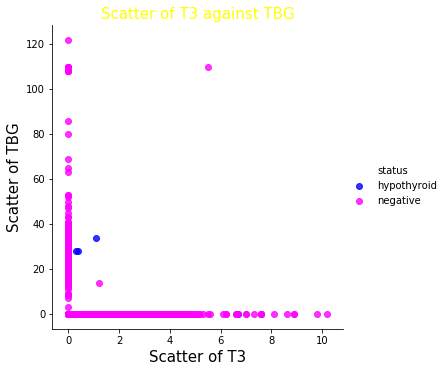

In [58]:
# Checking the relationship between TBG and T3
sns.lmplot(x='T3' ,y='TBG',hue='status',data=nairobi_hosp_data,palette=dict(hypothyroid='blue',negative='magenta'),fit_reg=False)
plt.title("Scatter of T3 against TBG",color="yellow",fontsize=15)
plt.xlabel("Scatter of T3" ,fontsize=15)
plt.ylabel("Scatter of TBG" ,fontsize=15)
plt.show()

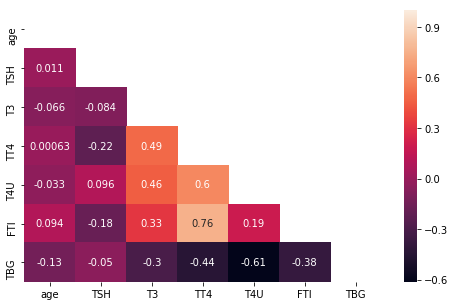

In [61]:
# Getting the relationship between variables in numeric values using a heatmap
#
# Correlation heatmap of the numerical variables 
corr  =nairobi_hosp_data.corr()

plt.figure(figsize = (8,5))
heatmap = np.zeros_like(nairobi_hosp_data.corr(), dtype=np.bool)
heatmap[np.triu_indices_from(heatmap)] = True
sns.heatmap(nairobi_hosp_data.corr(), annot=True, mask=heatmap)
plt.show()

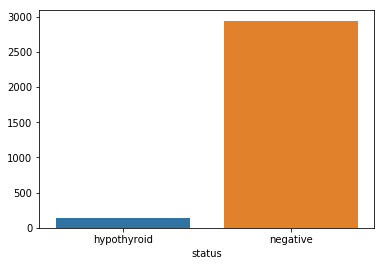

In [62]:
# Visualizing the target variable
target  = nairobi_hosp_data.groupby('status')['status'].count()
sns.barplot(target.index,target.values)
plt.show()

#STANDARDIZING AND MODELLING.

In [0]:
from sklearn.preprocessing import StandardScaler,robust_scale,minmax_scale

In [0]:
# Splitting the dataset into target and feature set
# Making categorical data into dummies

x = nairobi_hosp_data.drop('status',axis=1)
X = pd.get_dummies(x)

y = nairobi_hosp_data['status']
y =pd.get_dummies(y,drop_first=True)

In [0]:
#Applying SMOTE to balance the data

sm = SMOTE()
X, y = sm.fit_sample(X, y)

In [0]:
#To split the dataset for training and testing/

x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)

In [0]:
# Implementing Standard Scaler to nomalize the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#SUPPORT VECTOR MACHINE MODELLING.

In [0]:
#Importing support vector machine environments.
from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,r2_score,precision_score,recall_score,f1_score
import warnings

In [0]:
# implementing support vector machines with a linear kernel
svcl = SVC(kernel='linear')
svcl.fit(x_train,y_train)
y_pred = svcl.predict(x_test)
print("accuracy_score",accuracy_score(y_test,y_pred))
print("precision_score",precision_score(y_test,y_pred))
print("recall_score",recall_score(y_test,y_pred))
print("f1_score",f1_score(y_test,y_pred))

In [0]:
# implementing support vector machines with a polynomial kernel
svcp = SVC(kernel='poly')
svcp.fit(x_train,y_train)
y_pred = svcp.predict(x_test)
print("accuracy_score",accuracy_score(y_test,y_pred))
print("precision_score",precision_score(y_test,y_pred))
print("recall_score",recall_score(y_test,y_pred))
print("f1_score",f1_score(y_test,y_pred))

In [0]:
# implementing support vector machines with a sigmoid kernel
svcs = SVC(kernel='sigmoid')
svcs.fit(x_train,y_train)
y_pred = svcs.predict(x_test)
print("accuracy_score",accuracy_score(y_test,y_pred))
print("precision_score",precision_score(y_test,y_pred))
print("recall_score",recall_score(y_test,y_pred))
print("f1_score",f1_score(y_test,y_pred))

#DECISION TREE IMPLEMENTATION.

In [0]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,AdaBoostClassifier,AdaBoostRegressor,gradient_boosting

In [0]:
#Creating a random classifiers
ran_f = RandomForestClassifier()
ran_f.fit(x_train,y_train)
y_pred = ran_f.predict(x_test)
print("accuracy_score",accuracy_score(y_test,y_pred))
print("precision_score",precision_score(y_test,y_pred))
print("recall_score",recall_score(y_test,y_pred))
print("f1_score",f1_score(y_test,y_pred))

#Parameter Tuning.

In [0]:
#Importing model selection.
from sklearn.model_selection import train_test_split,RandomizedSearchCV,KFold

In [0]:
#Tuning to get the best parameters of randomforest
param ={
    "criterion":['gini','entropy'],
    "min_samples_split" : np.arange(1,100,1),
    "n_estimators":np.arange(1,100,1),
    "max_depth":np.arange(1,10,1),
    "n_jobs":np.arange(1,100,1)
}
kfold = KFold(n_splits=10,random_state=0)
rsc = RandomizedSearchCV(ran_f,param,cv=kfold,verbose=0,random_state=0)
rsc.fit(x_train,y_train)
print(rsc.best_params_)
print(rsc.best_score_)

In [0]:
#To create the tree for visualization purposes using 30 trees
clf = RandomForestClassifier(max_depth= 8,n_jobs= 83, min_samples_split= 87, criterion= 'gini',n_estimators= 30)
clf.fit(x_train,y_train)
data_dot = export_graphviz(clf,out_file=None,feature_names=X.columns,
                filled=True,rounded=True,special_characters=True)
graph = graphviz.Source(data_dot)
graph

#Boosting.